### 보스턴 집값 예측 

1. 문제 정의

보스턴 집값을 예측 

지도학습 /회귀

2.데이터 수집 

In [1]:
from sklearn.datasets import load_boston

In [2]:
dataset=load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

3.데이터 전처리

In [4]:
import pandas as pd

In [5]:
x=pd.DataFrame(dataset.data, columns=dataset.feature_names)
y=pd.Series(dataset.target, name='MEDV')

In [6]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

4.EDA

In [7]:
house= pd.concat([x,y],axis=1)
house.shape

(506, 14)

In [8]:
house.corr()  #상관계수

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

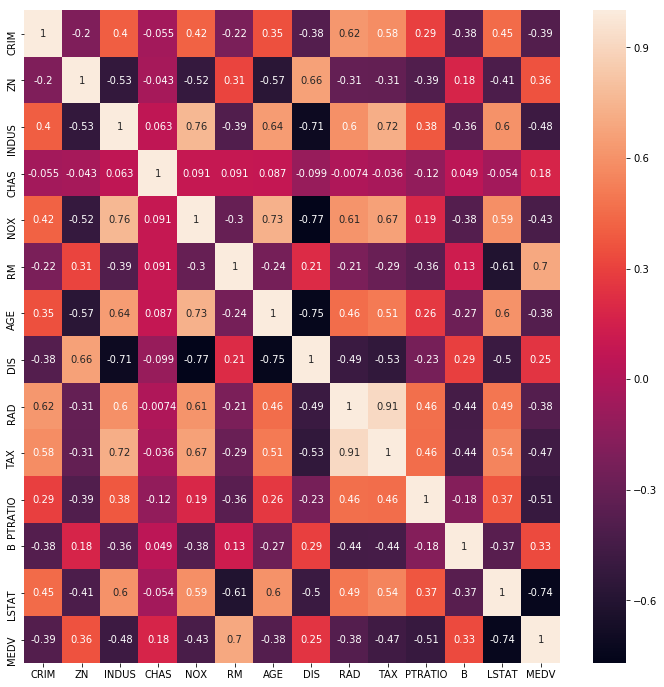

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(house.corr(),annot=True) #annot 숫자보기 

 5 모델 선택, 학습, 평가 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
for i in range(1,30):  # 회귀라 짝수 해도됨
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    print('k가{}일때'.format(i))
    print('R^2: {}'.format(knn.score(x_test,y_test)))

k가1일때
R^2: 0.3284204527665694
k가2일때
R^2: 0.4975246133736162
k가3일때
R^2: 0.5545587353916865
k가4일때
R^2: 0.5414374299079959
k가5일때
R^2: 0.5166480241894266
k가6일때
R^2: 0.4868405658926431
k가7일때
R^2: 0.47327606914622733
k가8일때
R^2: 0.4575477884877016
k가9일때
R^2: 0.47646058414129344
k가10일때
R^2: 0.4598302019192926
k가11일때
R^2: 0.46794435522277855
k가12일때
R^2: 0.4501821905143951
k가13일때
R^2: 0.44769255659079527
k가14일때
R^2: 0.4245370477262711
k가15일때
R^2: 0.41436459556745564
k가16일때
R^2: 0.4015585116075569
k가17일때
R^2: 0.38735095244524875
k가18일때
R^2: 0.37935032729522533
k가19일때
R^2: 0.3788044232102252
k가20일때
R^2: 0.37934073244817224
k가21일때
R^2: 0.3741207166842889
k가22일때
R^2: 0.36790016622531607
k가23일때
R^2: 0.354685929948827
k가24일때
R^2: 0.34715631468224173
k가25일때
R^2: 0.34435259974607635
k가26일때
R^2: 0.3361177860577123
k가27일때
R^2: 0.3271078422005533
k가28일때
R^2: 0.32245405589086873
k가29일때
R^2: 0.3140129552747484


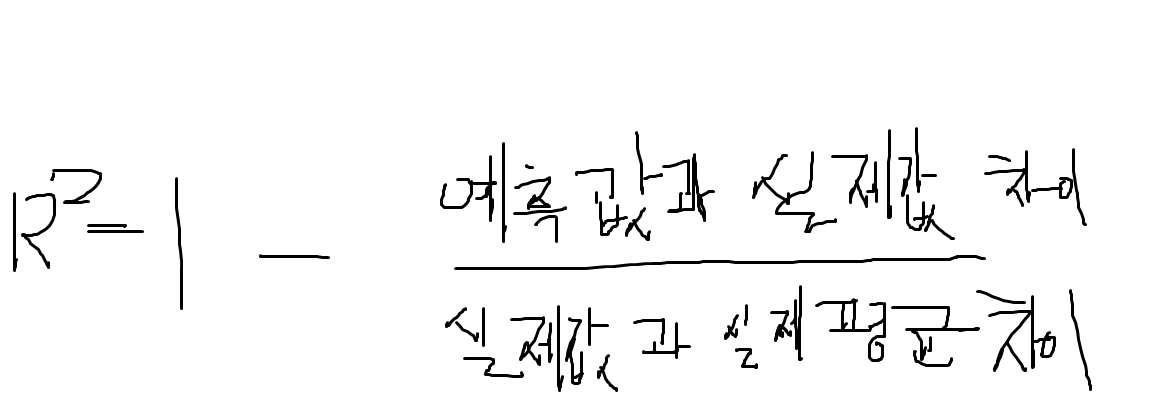

In [25]:
from sklearn.preprocessing import StandardScaler 

In [26]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test_sc=scaler.transform(x_test)

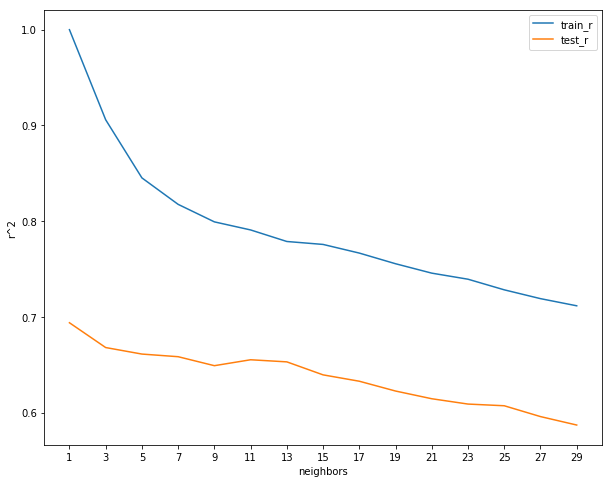

In [29]:
train_acc = []
test_acc = []
neighbors = range(1,30,2)
for k in neighbors: 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_sc,y_train)
    train_acc.append(knn.score(x_train_sc,y_train))
    test_acc.append(knn.score(x_test_sc,y_test))
    
plt.figure(figsize=(10,8))
plt.plot(neighbors, train_acc, label='train_r')
plt.plot(neighbors, test_acc, label='test_r')
plt.xlabel('neighbors')
plt.ylabel('r^2')
plt.xticks(neighbors)
plt.legend()

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('훈련 데이터 점수  : {}'.format(lr.score(x_train,y_train)))
print('테스트 데이터 점수  : {}'.format(lr.score(x_test,y_test)))



훈련 데이터 점수  : 0.7644563391821222
테스트 데이터 점수  : 0.6735280865347295


In [35]:
print('가중치 값 : {}'.format(lr.coef_))
print('절편 값 : {}'.format(lr.intercept_))

가중치 값 : [-1.19858618e-01  4.44233009e-02  1.18612465e-02  2.51295058e+00
 -1.62710374e+01  3.84909910e+00 -9.85471557e-03 -1.50002715e+00
  2.41507916e-01 -1.10671867e-02 -1.01897720e+00  6.95273216e-03
 -4.88110587e-01]
절편 값 : 37.99259277034405


In [36]:
!pip install mglearn

  Running setup.py bdist_wheel for mglearn: started
  Running setup.py bdist_wheel for mglearn: finished with status 'done'
  Stored in directory: C:\Users\pc-23\AppData\Local\pip\Cache\wheels\74\cf\8d\04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [37]:
import mglearn

In [39]:
x,y=mglearn.datasets.load_extended_boston()

In [40]:
x.shape

(506, 104)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.3)

In [46]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test_sc=scaler.transform(x_test)

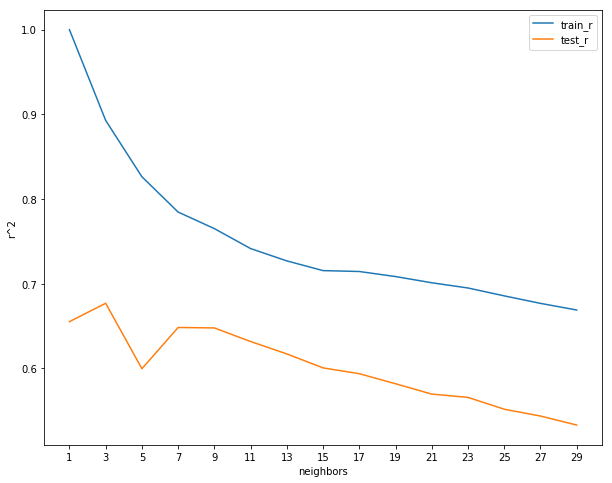

In [47]:
train_r = []
test_r = []
neighbors = range(1,30,2)
for k in neighbors: 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_sc,y_train)
    train_r.append(knn.score(x_train_sc,y_train))
    test_r.append(knn.score(x_test_sc,y_test))
    
plt.figure(figsize=(10,8))
plt.plot(neighbors, train_r, label='train_r')
plt.plot(neighbors, test_r, label='test_r')
plt.xlabel('neighbors')
plt.ylabel('r^2')
plt.xticks(neighbors)
plt.legend()

In [48]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('훈련 데이터 점수  : {}'.format(lr.score(x_train,y_train)))
print('테스트 데이터 점수  : {}'.format(lr.score(x_test,y_test)))

훈련 데이터 점수  : 0.9521543995600054
테스트 데이터 점수  : 0.6445420850401522


과대적합걸림  규제를 통해 일반화를 시켜라

In [49]:
from sklearn.linear_model import Ridge

In [54]:
x_train.shape


(354, 104)

알파가 커질수록 규제가 쎄짐

In [71]:
for a in [0.001,0.01,0.1,1,10,100,1000]:
    rigde= Ridge(alpha=a)
    rigde.fit(x_train,y_train)
    print('alpha : {}, \n훈련데이터점수 : {}'.format(a,rigde.score(x_train,y_train)))
    print('테스트 데이터 점수 {}'.format(rigde.score(x_test,y_test)))

alpha : 0.001, 
훈련데이터점수 : 0.9507473175371283
테스트 데이터 점수 0.6831603407853761
alpha : 0.01, 
훈련데이터점수 : 0.9441027293202772
테스트 데이터 점수 0.7466356958099852
alpha : 0.1, 
훈련데이터점수 : 0.9273208285635965
테스트 데이터 점수 0.7968978397300338
alpha : 1, 
훈련데이터점수 : 0.882325558138437
테스트 데이터 점수 0.78344900643765
alpha : 10, 
훈련데이터점수 : 0.7799355994305046
테스트 데이터 점수 0.6780174716118332
alpha : 100, 
훈련데이터점수 : 0.5764133392528854
테스트 데이터 점수 0.47273607667359935
alpha : 1000, 
훈련데이터점수 : 0.2602290493637649
테스트 데이터 점수 0.21898233246028098


In [61]:
from sklearn.linear_model import Lasso

In [65]:
import numpy as np

In [69]:
for a in [0.001,0.01,0.1,1,10,100,1000]:
    lasso= Lasso(alpha=a)
    lasso.fit(x_train,y_train)
    print('alpha : {}, \n훈련데이터점수 : {}'.format(a,lasso.score(x_train,y_train)))
    print('테스트 데이터 점수 {}'.format(lasso.score(x_test,y_test)))
    print('사용한 특성의 개수 :{}'.format(np.sum(lasso.coef_!=0)))

alpha : 0.001, 
훈련데이터점수 : 0.9352348764510312
테스트 데이터 점수 0.7775725671866757
사용한 특성의 개수 :73
alpha : 0.01, 
훈련데이터점수 : 0.895261813867345
테스트 데이터 점수 0.7970812477967446
사용한 특성의 개수 :34
alpha : 0.1, 
훈련데이터점수 : 0.7633066865052462
테스트 데이터 점수 0.673133250054226
사용한 특성의 개수 :8
alpha : 1, 
훈련데이터점수 : 0.2648948112459243
테스트 데이터 점수 0.2136447822416102
사용한 특성의 개수 :3
alpha : 10, 
훈련데이터점수 : 0.0
테스트 데이터 점수 -0.0060197319476869016
사용한 특성의 개수 :0
alpha : 100, 
훈련데이터점수 : 0.0
테스트 데이터 점수 -0.0060197319476869016
사용한 특성의 개수 :0
alpha : 1000, 
훈련데이터점수 : 0.0
테스트 데이터 점수 -0.0060197319476869016
사용한 특성의 개수 :0


C:\Users\pc-23\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [13]:
x.shape

(506, 13)

In [14]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [18]:
for i in range(0,13):   
    for j in range(i,13):
        x[x.columns[i]+'x'+x.columns[j]]=x[x.columns[i]]*x[x.columns[j]]
    

In [19]:
x.shape

(506, 104)

In [20]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()

In [24]:
x2_sc=scaler.fit_transform(x)

In [26]:
x2_sc=pd.DataFrame(x2_sc)

In [27]:
x2_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.111883,0.158299,0.415874,0.039337,0.231614,0.720857,0.068454,1.000000,0.130834,0.015157
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.050143,0.139227,0.339867,0.069100,0.486041,0.838769,0.185097,1.000000,0.240435,0.055985
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.050143,0.139227,0.336374,0.019214,0.486041,0.830160,0.062440,0.979596,0.104717,0.009208
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.030422,0.125760,0.309929,0.006201,0.587043,0.876173,0.039844,0.988594,0.076645,0.003928
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.030422,0.125760,0.311716,0.027605,0.587043,0.881218,0.100113,1.000000,0.140056,0.017666
